In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
insurance_df=pd.read_csv('insurance.csv')

In [3]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(insurance_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
dummy1=pd.get_dummies(insurance_df['sex'])

In [7]:
dummy1.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [8]:
dummy2=pd.get_dummies(insurance_df['smoker'])

In [9]:
dummy2.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [10]:
dummy3=pd.get_dummies(insurance_df['region'])

In [11]:
dummy3.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [12]:
insurance=pd.concat((insurance_df,dummy1,dummy2,dummy3),axis=1)

In [13]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


In [14]:
cols_to_use=['age','bmi','children','charges','male','yes','northeast','northwest','southeast']

insurance=insurance[cols_to_use]

In [15]:
insurance.head()

,age,bmi,children,charges,male,yes,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [16]:
insurance=insurance.rename(columns={'male':'sex'})

In [17]:
insurance.head()

,age,bmi,children,charges,sex,yes,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [18]:
insurance=insurance.rename(columns={'yes':'smoker'})

In [19]:
insurance.head()

,age,bmi,children,charges,sex,smoker,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [20]:
# Data Preparation
x = insurance.drop('charges',axis=1)
y = insurance['charges']

In [21]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x = st.fit_transform(x)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x=pca.fit_transform(x)
p_var = pca.explained_variance_ratio_
np.set_printoptions(suppress = True)
print(p_var)

[0.19604525 0.16579217 0.1365214  0.13215629 0.11941831 0.11577156
 0.09376127 0.04053374]


In [23]:
print(x)

[[-0.21415736  0.28093015  1.74665258 ...  1.6926151   0.60884265
   1.09165954]
 [ 1.68562183 -0.00878705  1.14181711 ... -1.48338812 -0.09553659
  -0.32067505]
 [ 1.65965158 -0.19181739  0.45680249 ... -1.47499669 -0.46068376
  -0.35716155]
 ...
 [ 1.78572867  0.0003277   0.2392048  ... -0.29900264  0.66709449
  -0.30212269]
 [-0.66608241  0.06724206  0.36045728 ... -0.04705794 -0.03800285
   1.01188964]
 [-0.72822907 -1.40952272 -0.01594287 ...  2.80487805  0.12677414
  -0.25618319]]


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state =  0)

In [25]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [26]:

y_pred = reg.predict(x_test)
print(y_pred)

[11015.74241852  9500.84490047 37956.97191777 16108.87330766
  7025.39958707  4218.12862892  1827.92406235 14363.98494116
  9061.87495132  7506.25393651  4884.28157924 10346.79912395
  8696.46969369  3848.10941965 27793.47147473 10787.10256953
 11285.21886753  6263.00746298  8234.13155098 27209.55043213
 33591.30661179 14337.91276455 11927.65523358 32054.26214914
  4075.71677507  9358.60925085  1428.91094474  9825.78280014
  3806.0184153  10409.76003389  9074.71148498 39822.39905321
 15431.06040808 13624.36330551 24978.59092119  5394.35151802
 12508.07952242 30461.69954157 33456.53315165  3512.5502838
  4290.31151379  3954.86930897 30635.62744125 39318.10278656
 27635.98565158  5096.39546015 10679.836177    7831.08447883
  3908.5290758  10283.38734898  5874.37887424  3505.0973271
 32800.40266346 38573.77413439 15905.38417016  7267.59093391
  5625.8728149   9430.01249379  9014.63266006 11744.81872607
  1704.51941145 38815.22470249 14871.31229921 11651.03455449
 14236.87019226 13844.5947

In [27]:
import sklearn.metrics as met
mse=met.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=met.r2_score(y_test,y_pred)
print('mean squared error:',mse)
print('root mean squared error:',rmse)
print('r2_score:',r2)

mean squared error: 34577221.79775882
root mean squared error: 5880.239943893345
r2_score: 0.8216781468713605


Text(0, 0.5, 'y_pred')

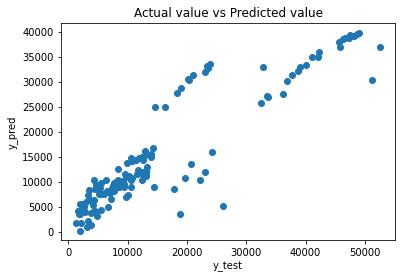

In [28]:
plt.scatter(y_test,y_pred)
plt.title("Actual value vs Predicted value")
plt.xlabel('y_test')
plt.ylabel('y_pred')

Text(0, 0.5, 'y_pred')

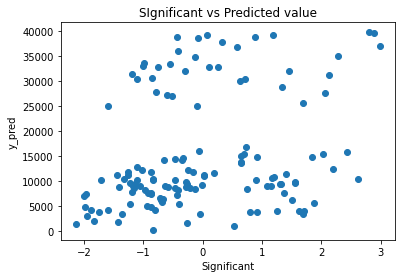

In [29]:
plt.scatter(x_test[:,0],y_pred)
plt.title("SIgnificant vs Predicted value")
plt.xlabel('Significant')
plt.ylabel('y_pred')

<IPython.core.display.Javascript object>


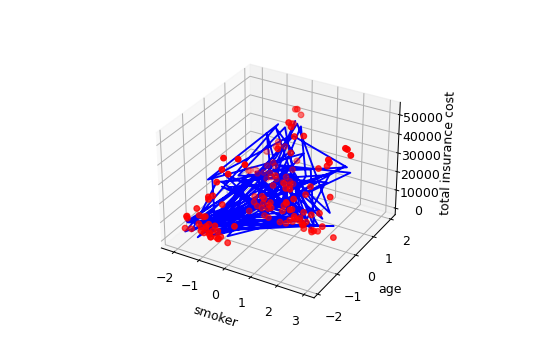

Text(0.5, 0, 'total insurance cost')

In [30]:
%matplotlib notebook
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_test[:,0],x_test[:,1],y_test,c ='red')
ax.plot3D(x_test[:,0],x_test[:,1],y_pred,c ='blue')
ax.set_xlabel('smoker')
ax.set_ylabel('age')
ax.set_zlabel('total insurance cost')